# Predicting the possibility of heart disease with logistic regression

### Importing data and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
import lightgbm as lgb


In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Inspecting Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


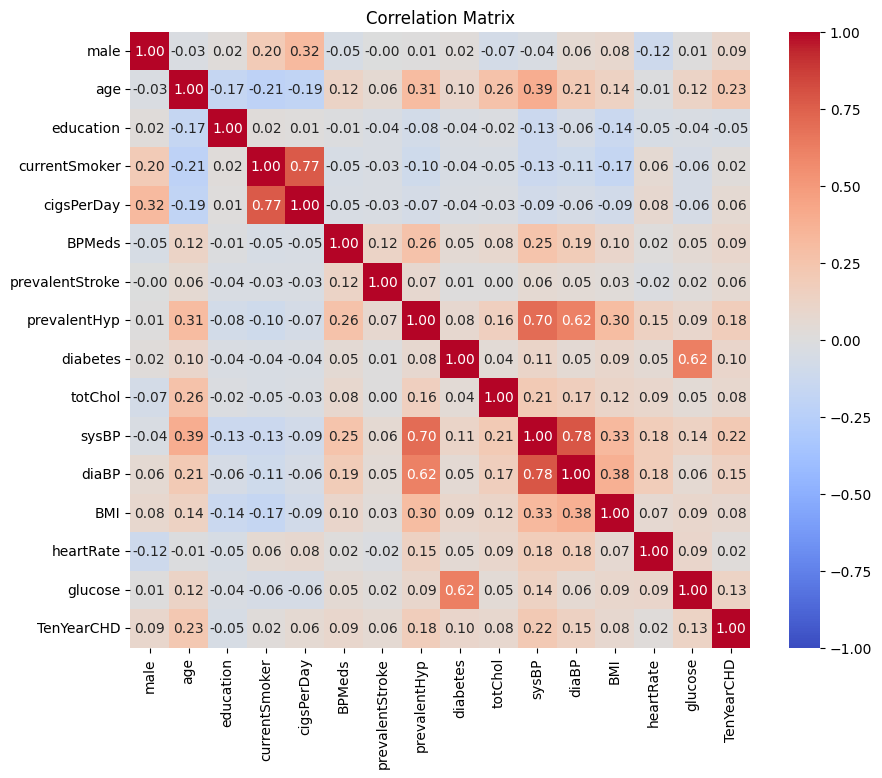

In [5]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.drop_duplicates(inplace=True)
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Dropping rows with more than 3 missing values
df.dropna(thresh=len(df.columns) - 3, inplace=True)

In [8]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Dropping rows with several missing entries did not change anything on our dataframe. This means there was no row with such parameters.

<Axes: >

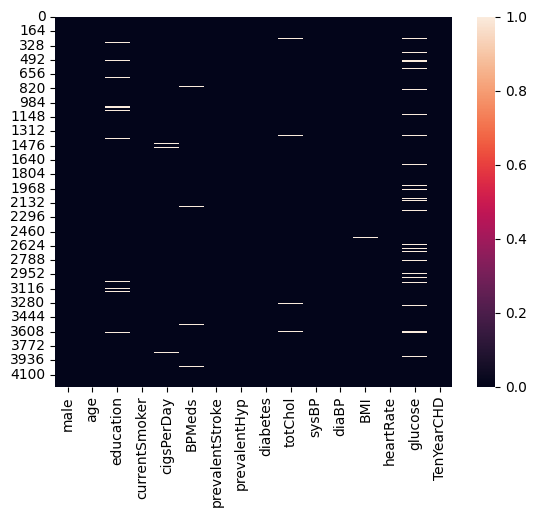

In [9]:
sns.heatmap(df.isna(), cbar=True)

### Handling missing data

Column: education
Mean: 1.9789499153157513
Median: 2.0
Mode: 1.0
Standard Deviation: 1.019790689312203




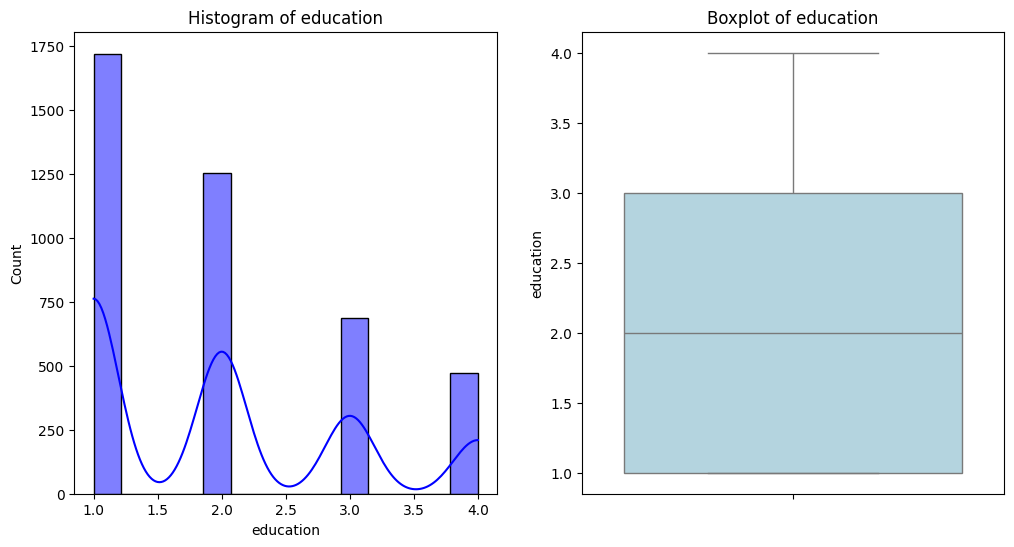

Column: cigsPerDay
Mean: 9.003088619624615
Median: 0.0
Mode: 0.0
Standard Deviation: 11.92009358782776




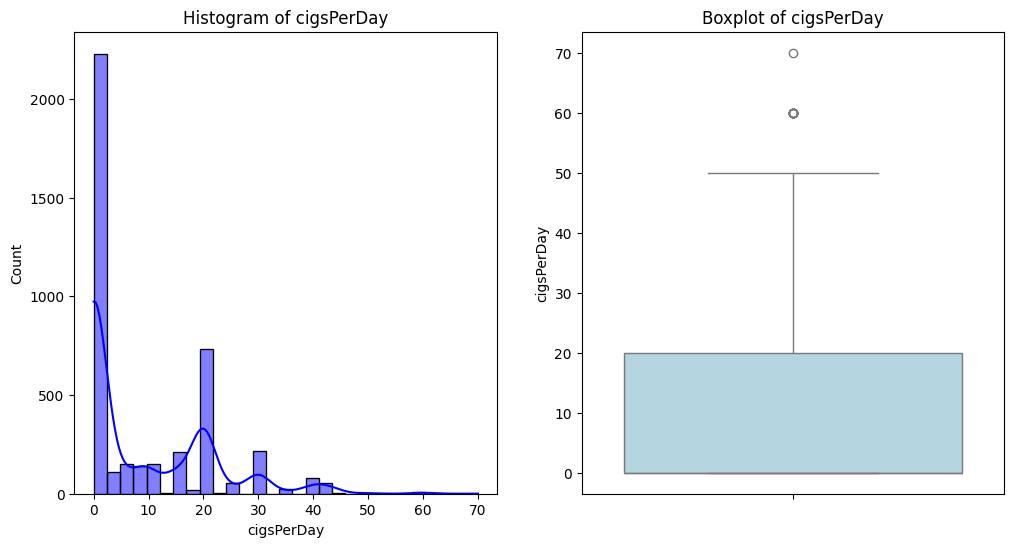

Column: BPMeds
Mean: 0.02962962962962963
Median: 0.0
Mode: 0.0
Standard Deviation: 0.16958356790200033




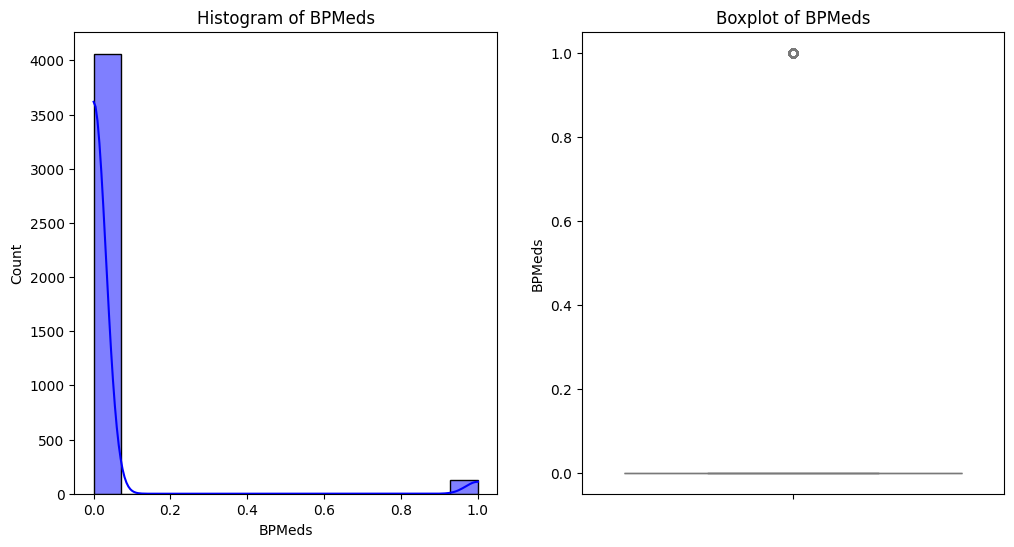

Column: totChol
Mean: 236.72158548233045
Median: 234.0
Mode: 240.0
Standard Deviation: 44.590334318749456




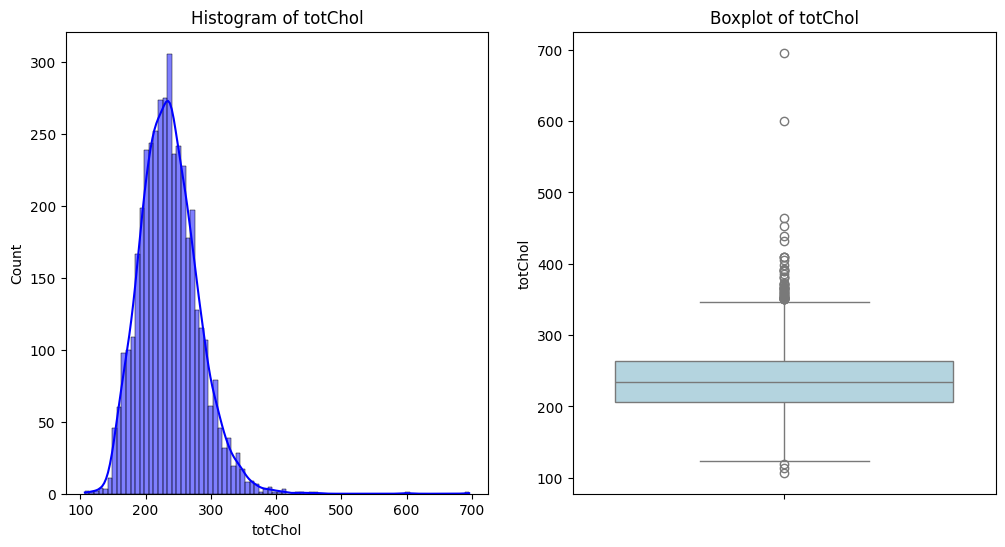

Column: BMI
Mean: 25.80200758473572
Median: 25.4
Mode: 22.19
Standard Deviation: 4.080111062409028




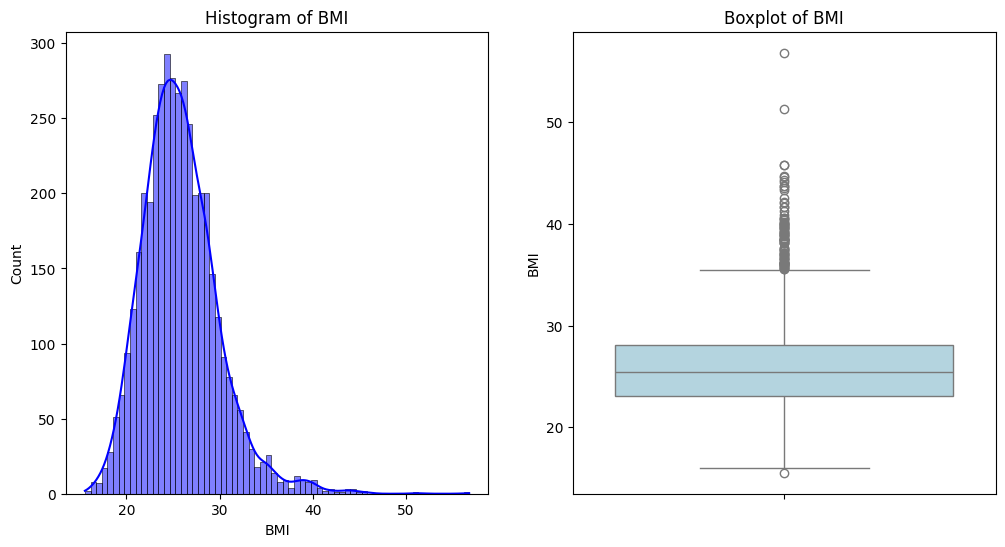

Column: heartRate
Mean: 75.87892376681614
Median: 75.0
Mode: 75.0
Standard Deviation: 12.0265963516126




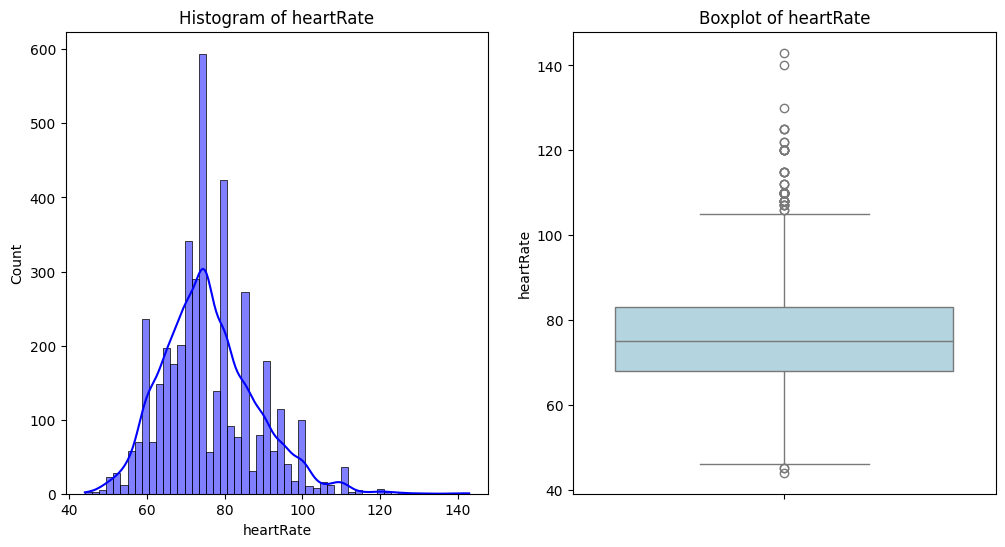

Column: glucose
Mean: 81.96675324675324
Median: 78.0
Mode: 75.0
Standard Deviation: 23.959998189237478




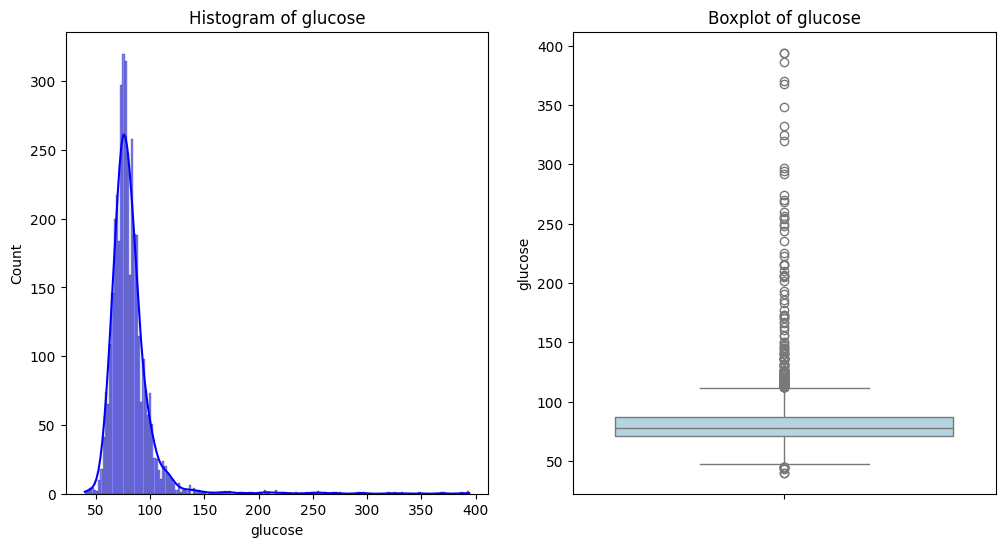

In [10]:
# Selecting columns with missing values
columns_with_na = df.columns[df.isna().any()].tolist()

# Describing the distribution of columns with missing values
for col in columns_with_na:
    print(f"Column: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")
    print("\n")
    
    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    
    plt.show()

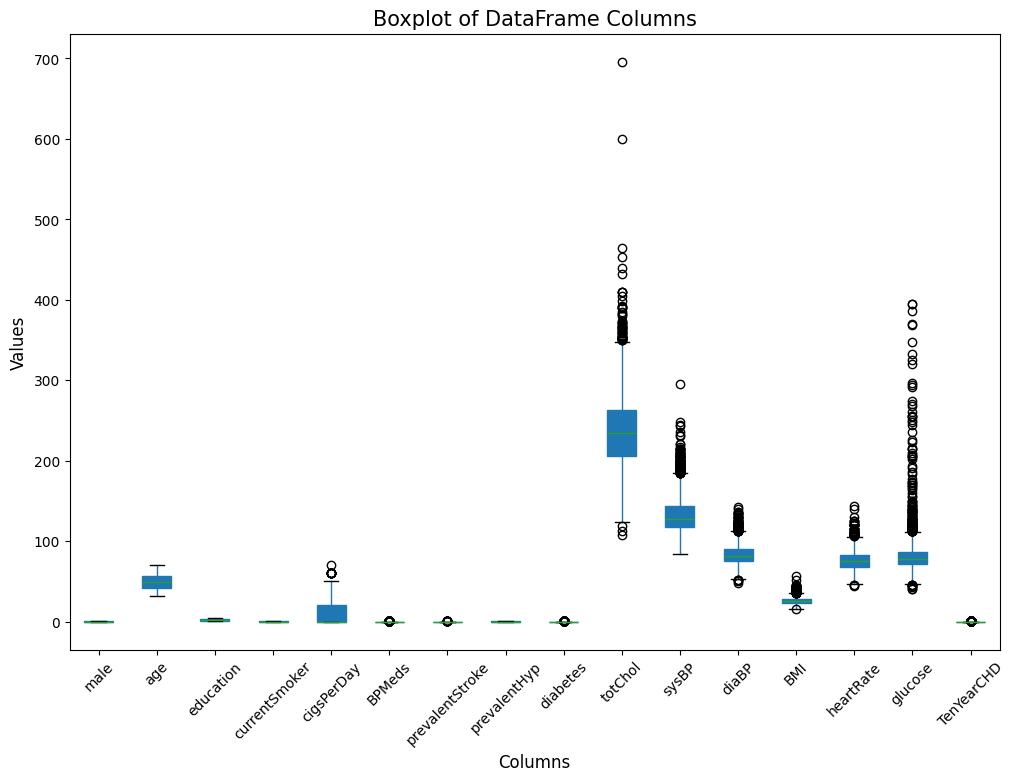

In [11]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(12, 8))

# Create the boxplot
boxplot = df.boxplot(grid=False, rot=45, fontsize=10, patch_artist=True)

# Customize the boxplot
for box in boxplot.artists:
    box.set_facecolor('lightblue')

# Add title and labels
plt.title('Boxplot of DataFrame Columns', fontsize=15)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Show the plot
plt.show()

It is clear that none of the columns with missing values are normally distributed. Therefore, we will use the median to fill in the missing values, where applicable.

#### Exploring connections between variables

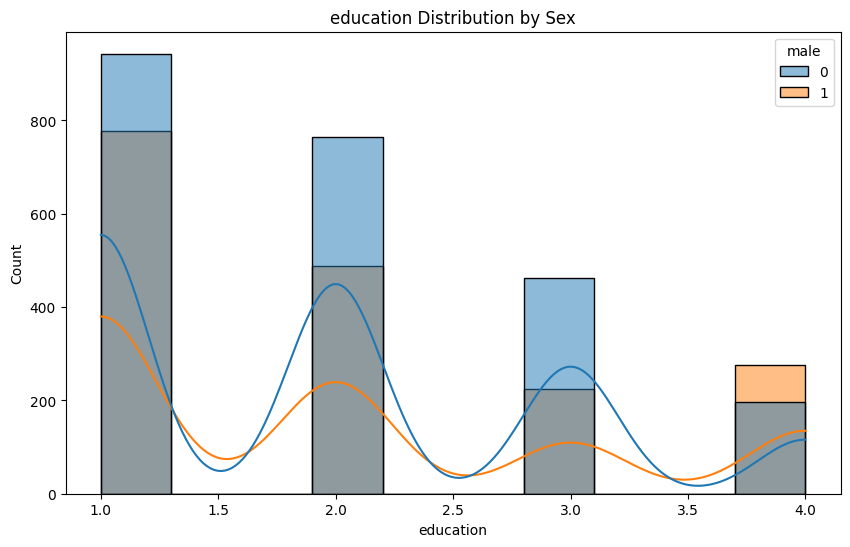

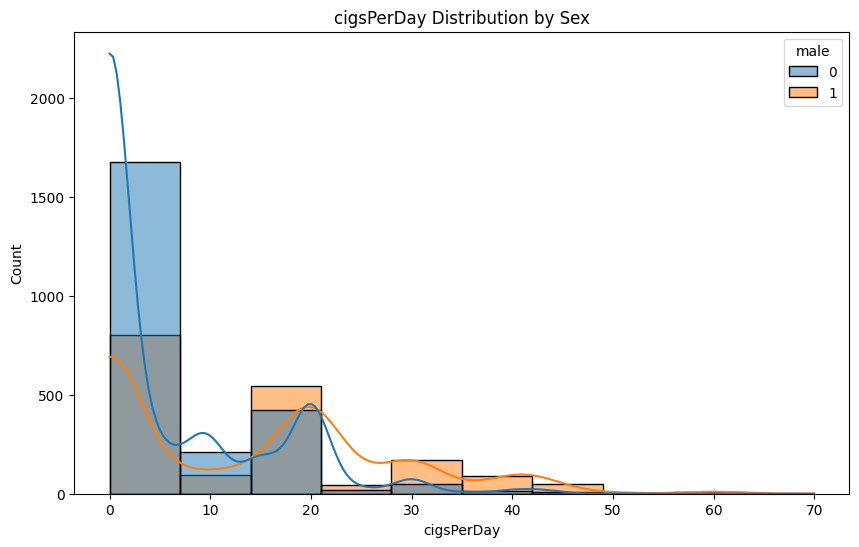

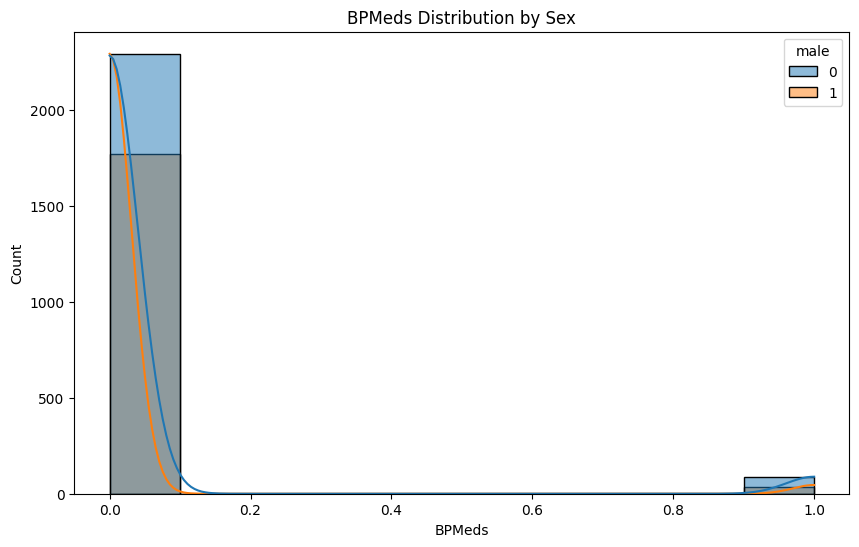

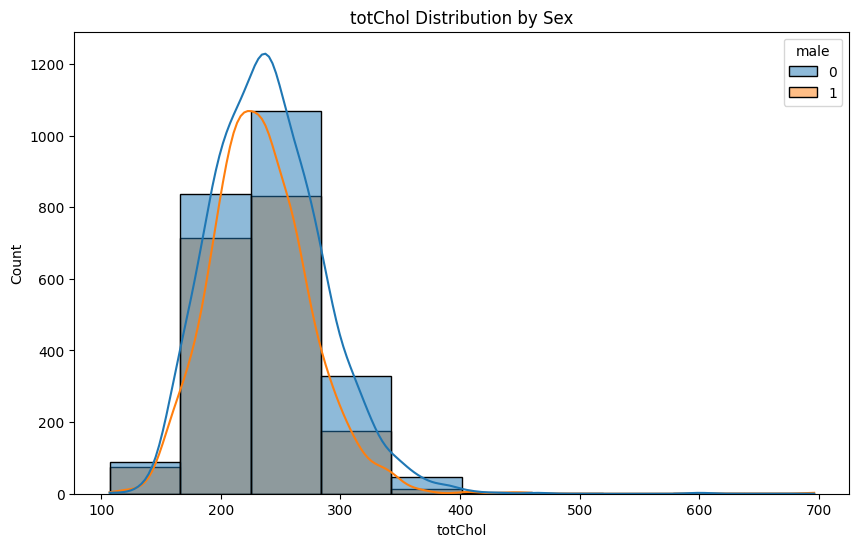

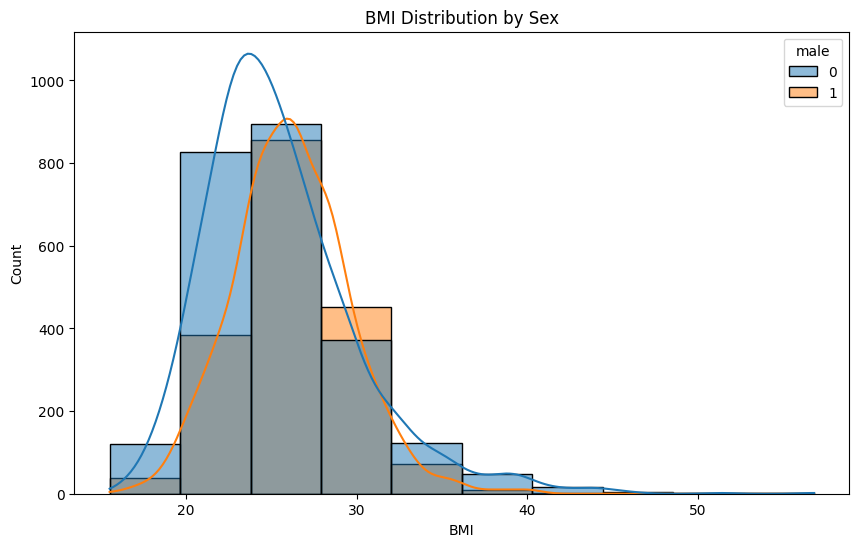

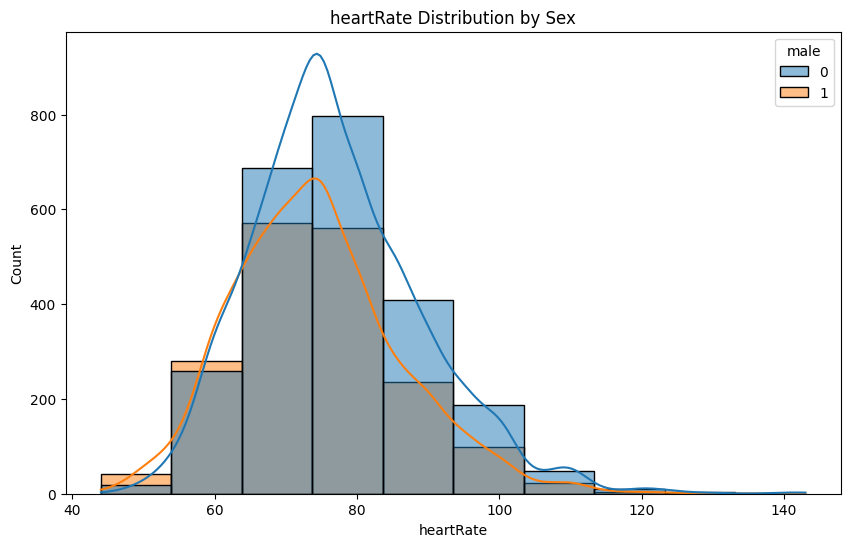

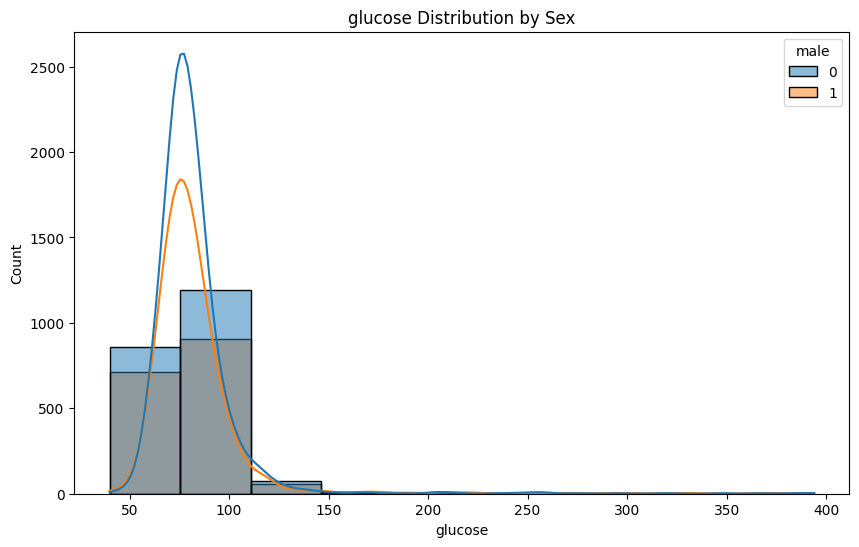

In [12]:
# Exploring the connection between sex and the columns with missing values
for col in columns_with_na:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='male', bins=10, kde=True)
    plt.title(f'{col} Distribution by Sex')
    plt.show()

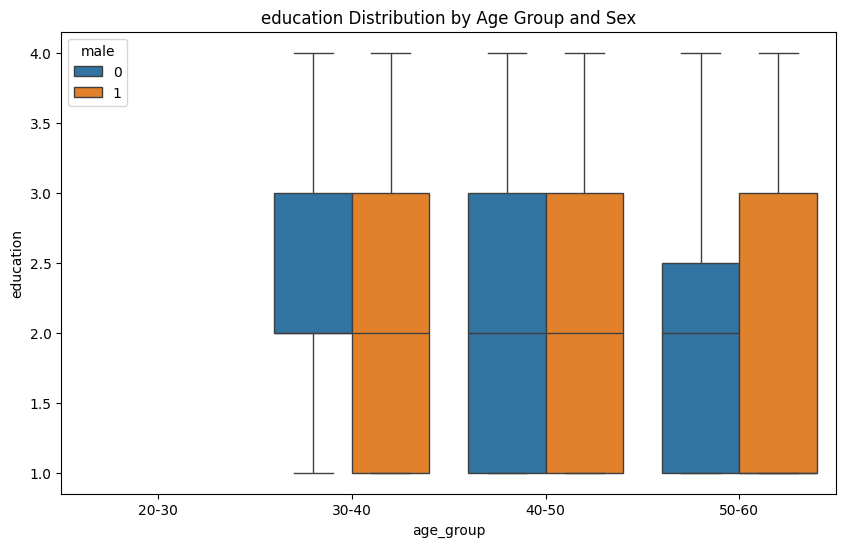

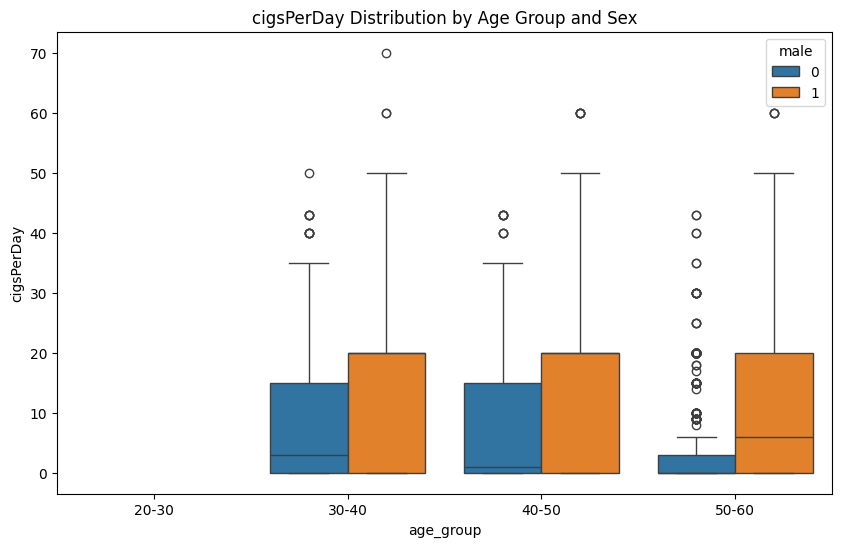

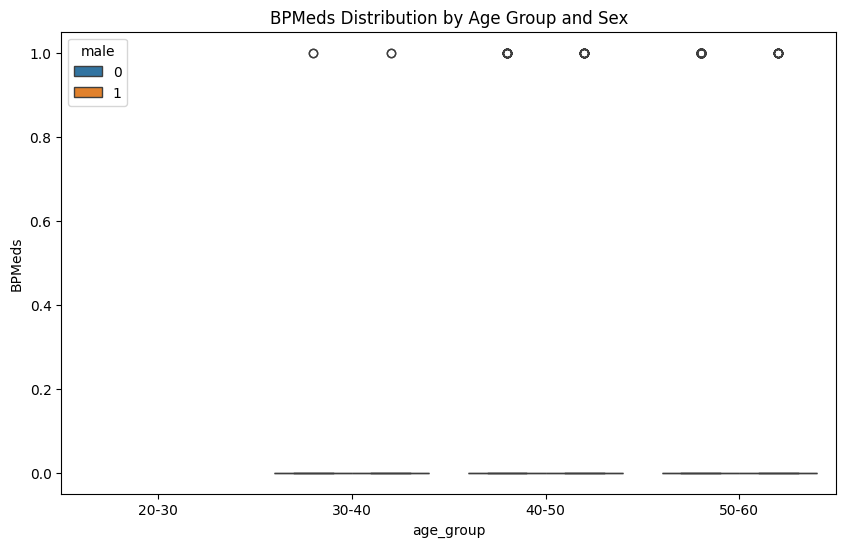

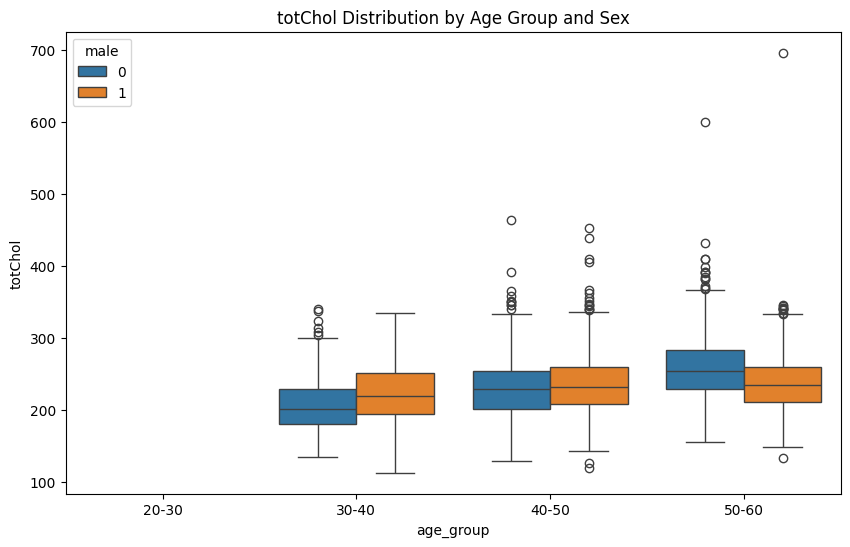

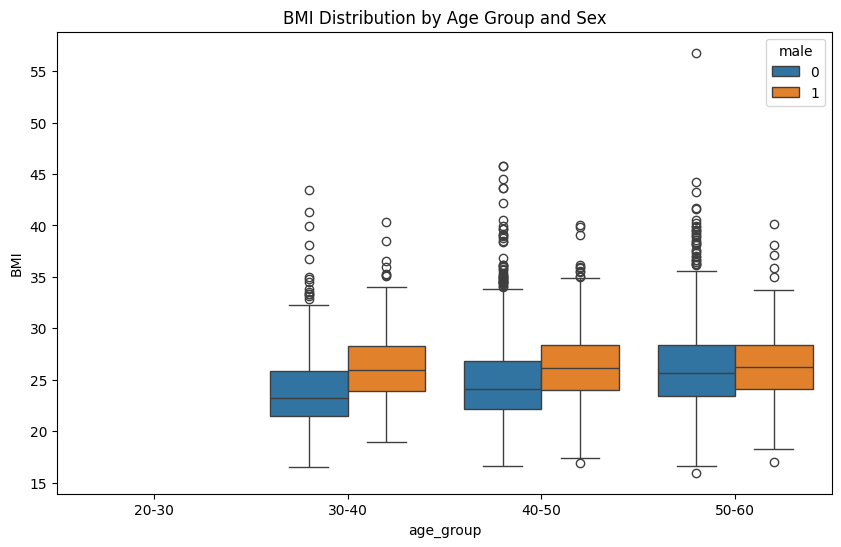

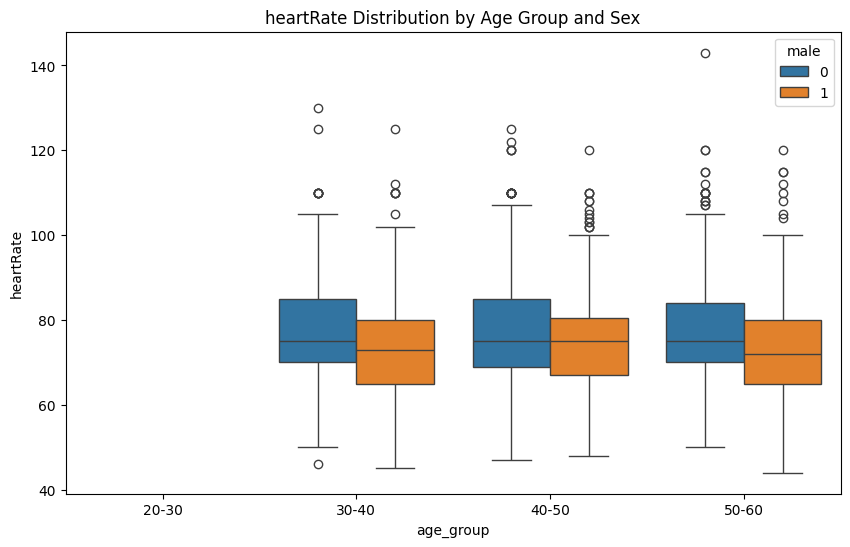

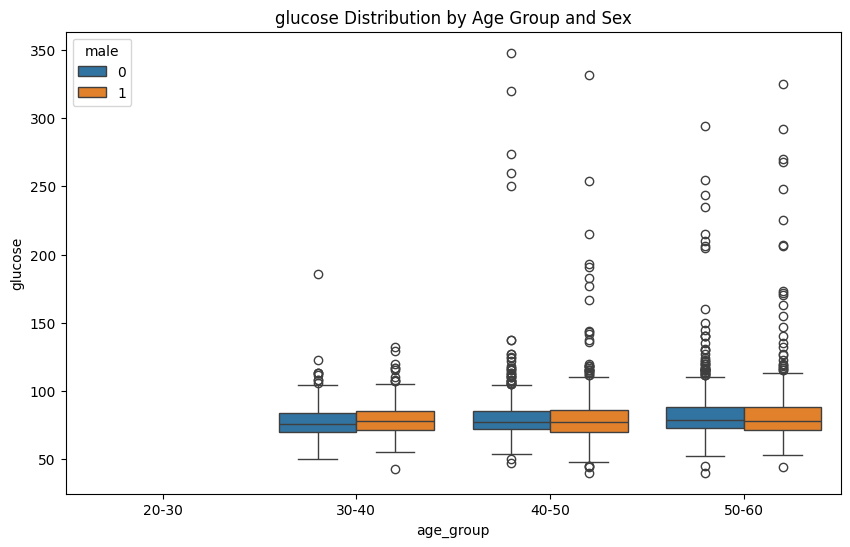

In [13]:
# including age groups into the model
df2 = df.copy()
df2['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
for col in columns_with_na:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df2, x='age_group', y=col, hue='male')
    plt.title(f'{col} Distribution by Age Group and Sex')
    plt.show()

Based on the plots, heartRate is mostly influenced by the sex of the person, while BMI, totChol, cigsPerDay and education are affected by both age and sex. Based on this and their distributions, I imputed the mean or median value of the respective category for each instance with missing values.

#### Imputing missing values

In [14]:
mean_heartrate_by_sex = df2.groupby('male')['heartRate'].mean()

#Defining a function to fill missing values based on the age
def impute_heartrate(row):
    if pd.isnull(row['heartRate']):
        # If heartrate is NaN, fill with mean heartrate of that age
        return mean_heartrate_by_sex[row['male']]
    else:
        return row['heartRate']

# Apply the function to the DataFrame
df2['heartRate'] = df2.apply(impute_heartrate, axis=1)

In [15]:
#Same method used as above, but implenting a loop for all columns that are affected by both age and sex
affected_columns = ['BMI', 'totChol', 'cigsPerDay']

for col in affected_columns:
    # Calculate median values for each age_group - sex combination and overall as well
    median_col_by_age_sex = df2.groupby(['age_group', 'male'])[col].median()
    overall_median = df2[col].median()
    def impute_median(row, col=col):
        if pd.isnull(row[col]):
            group_median = median_col_by_age_sex.get((row['age_group'], row['male']))
            if group_median is not None:  # Check if median exists
                return group_median
            else:
                return overall_median  # Use overall median as fallback
        else:
            return row[col]

    df2[col] = df2.apply(impute_median, axis=1)


C:\Users\tamas\AppData\Local\Temp\ipykernel_32532\4114469537.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_col_by_age_sex = df2.groupby(['age_group', 'male'])[col].median()
C:\Users\tamas\AppData\Local\Temp\ipykernel_32532\4114469537.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_col_by_age_sex = df2.groupby(['age_group', 'male'])[col].median()
C:\Users\tamas\AppData\Local\Temp\ipykernel_32532\4114469537.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

In [16]:
# The exact same method was used for education, however the fallback in this case is 0.
# The reason is that the age group 0-20 has no education, so the ordinal number 0 is used as a fallback.
mode_col_by_age_sex = df2.groupby(['age_group', 'male'])['education'].median()

def impute_mode(row):
    if pd.isnull(row['education']):
            group_median = median_col_by_age_sex.get((row['age_group'], row['male']))
            if group_median is not None:
                return group_median
            else:
                return 0
    else:
        return row['education']
    
df2['education'] = df2.apply(impute_mode, axis=1)

C:\Users\tamas\AppData\Local\Temp\ipykernel_32532\2765314960.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_col_by_age_sex = df2.groupby(['age_group', 'male'])['education'].median()


In [17]:
# BPMeds is a binary column, and based on the plots, it seems not to be affected by age and sex
# Therefore, we can use KNN imputer to fill the missing values, that maps the most likely data point based on the other columns
imputer = KNNImputer(n_neighbors=5)
df2[['BPMeds']] = imputer.fit_transform(df2[['BPMeds']])
# It takes the average of the 5 nearest neighbours, therefore I used round function to keep the binary distribution
df2['BPMeds'] = df2['BPMeds'].round().astype(int)

In [18]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-40
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-50
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-50
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,NaN
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-50


In [19]:
df2.drop(["age_group"], axis=1, inplace=True)

Column: target_log
Mean: 4.381138834775844
Median: 4.3694478524670215
Mode: 4.330733340286331
Standard Deviation: 0.1564638988422771




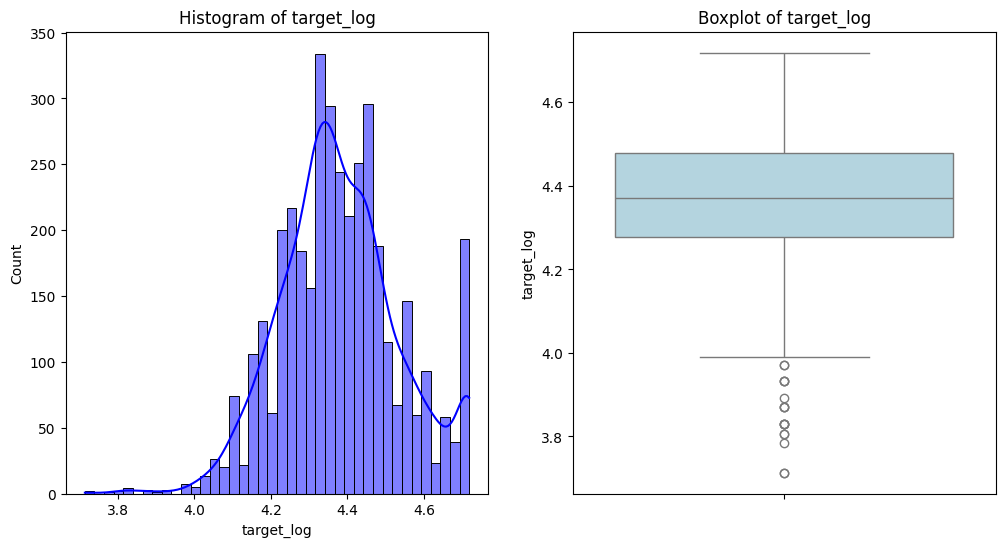

In [20]:
# Glucose did not show any correlation with age or sex either, but it contained a lot of missing values
# Therefore, I included every other variable to the model to predict the missing values
# The data is continuous, and the distribution is left skewed
# I tried log transformation to make the data more normal, and also implemented outlier capping to avoid the effect of outliers
# However the data was still not normal, and the distribution was not improved
df3 = df2.copy()

# Identifying outliers using IQR method
Q1 = df2['glucose'].quantile(0.25)
Q3 = df2['glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
df3['glucose'] = np.where(df2['glucose'] < lower_bound, lower_bound, df2['glucose'])
df3['glucose'] = np.where(df2['glucose'] > upper_bound, upper_bound, df2['glucose'])

# Log transformation
df3['target_log'] = np.log(df3['glucose'] + 1)

print(f"Column: target_log")
print(f"Mean: {df3['target_log'].mean()}")
print(f"Median: {df3['target_log'].median()}")
print(f"Mode: {df3['target_log'].mode()[0]}")
print(f"Standard Deviation: {df3['target_log'].std()}")
print("\n")

# Plotting histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df3['target_log'], kde=True, color='blue')
plt.title(f'Histogram of target_log')

# Plotting boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df3['target_log'], color='lightblue')
plt.title(f'Boxplot of target_log')

plt.show()

In [21]:
# Due to the distribution and the number of outliers, I could not use linear regression to predict the missing values
# Therefore, I used Random Forest Regressor, which is more robust to outliers

# Splitting the data into training and testing sets
df_missing = df2[df2['glucose'].isnull()]
df_not_missing = df2[df2['glucose'].notnull()]

# X_train contains the predictor variables for the rows without missing values
X_train_imputation = df_not_missing.drop(['glucose'], axis=1)
y_train_imputation = df_not_missing['glucose']

# X_test contains the predictor variables for the rows with missing values
X_test_imputation = df_missing.drop(['glucose'], axis=1)

# training the model
# Define and fit the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train_imputation, y_train_imputation)

# prediction
predicted_values = model.predict(X_test_imputation)

# imputation
df2.loc[df['glucose'].isnull(), 'glucose'] = predicted_values

In [22]:
df2.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Transforming the dataset for the logistic regression task

In [23]:
data = df2.drop(["TenYearCHD"], axis=1)
target = df2["TenYearCHD"]

In [24]:
scaler = StandardScaler()

cont_data = data.select_dtypes(include=['float64'])
int_data = data.select_dtypes(include=['int64'])

x_float = scaler.fit_transform(cont_data)
x = np.concatenate((x_float, int_data), axis=1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=1312)

### Model training and evaluation

In [26]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

c:\Users\tamas\Documents\GitHub\Projects\data_analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.85


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       718
           1       0.73      0.06      0.11       130

    accuracy                           0.85       848
   macro avg       0.79      0.53      0.52       848
weighted avg       0.83      0.85      0.80       848



Class imbalance heavily affected the recall rate for class 1 therefore the model is not effectively distinguishes whether someone has a chance of heart disease in the close future or not. To fix this, I try different sampling methods to fine-tune the model.

#### Model sampling

In [29]:
# Undersampling the majority class first using RandomUnderSampler
rus = RandomUnderSampler(random_state=4)
x_us, y_us = rus.fit_resample(x_train, y_train)
y_pred_us = lr.predict(x_test)
print(classification_report(y_test, y_pred_us))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       718
           1       0.73      0.06      0.11       130

    accuracy                           0.85       848
   macro avg       0.79      0.53      0.52       848
weighted avg       0.83      0.85      0.80       848



In [30]:
# Using ensemble method on the undersampled data by the ratio of 7:1 to even out the training process
ensemble_model = EasyEnsembleClassifier(n_estimators=123, random_state=4)
ensemble_model.fit(x_us, y_us)
y_pred_ensemble = ensemble_model.predict(x_test)

print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       718
           1       0.26      0.68      0.38       130

    accuracy                           0.66       848
   macro avg       0.59      0.67      0.57       848
weighted avg       0.82      0.66      0.70       848



In [31]:
# Oversampling the minority class by using SMOTE on the oversampled data
smote = SMOTE(random_state=4)
x_os, y_os = smote.fit_resample(x_us, y_us)
lr.fit(x_os, y_os)
y_pred_os = lr.predict(x_test)
print(classification_report(y_test, y_pred_os))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       718
           1       0.26      0.66      0.38       130

    accuracy                           0.66       848
   macro avg       0.59      0.66      0.57       848
weighted avg       0.82      0.66      0.71       848



c:\Users\tamas\Documents\GitHub\Projects\data_analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Using class_weight='balanced' parameter in Logistic Regression on the resampled data
# This modifies the loss function to penalize the minority class more
lr_bal = LogisticRegression(class_weight='balanced')
lr_bal.fit(x_os, y_os)
y_pred_bal = lr_bal.predict(x_test)
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       718
           1       0.26      0.66      0.38       130

    accuracy                           0.66       848
   macro avg       0.59      0.66      0.57       848
weighted avg       0.82      0.66      0.71       848



c:\Users\tamas\Documents\GitHub\Projects\data_analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.95      0.39      0.56       718
           1       0.21      0.88      0.34       130

    accuracy                           0.47       848
   macro avg       0.58      0.64      0.45       848
weighted avg       0.84      0.47      0.52       848



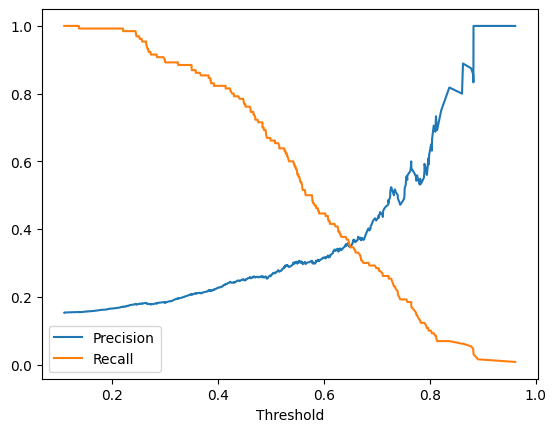

In [33]:
# Predicting probabilities and adjusting the threshold
y_prob = lr_bal.predict_proba(x_test)[:, 1]

threshold = 0.35
y_pred_adjusted = (y_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

# Plotting the Precision-Recall curve to find the optimal threshold for our problem
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

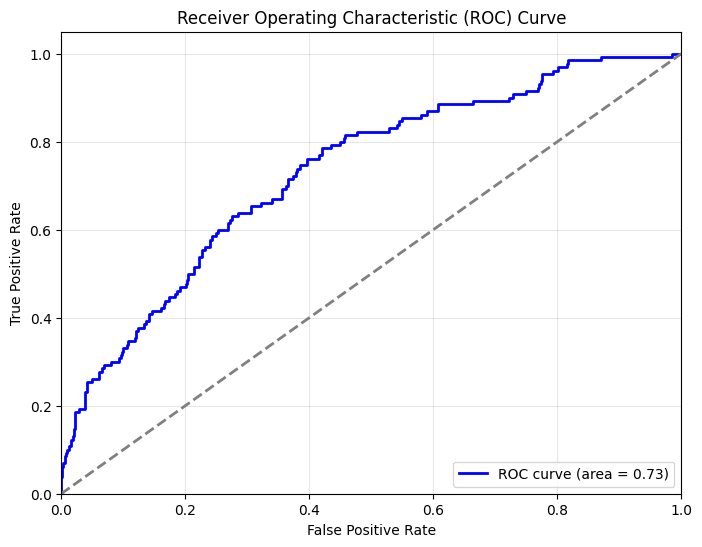

In [34]:
# Computing ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Trying another model

Light Gradient Boosting Classifier is less sensitive to class imbalance therefore we might get a better result by using it as a classification model with the unbalance property set to True.

In [35]:
lg = lgb.LGBMClassifier(is_unbalance=True, random_state=42)
lg.fit(x_train, y_train)
y_pred_lg = lg.predict(x_test)
print(classification_report(y_test, y_pred_lg))

[LightGBM] [Info] Number of positive: 514, number of negative: 2876
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 3390, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151622 -> initscore=-1.721932
[LightGBM] [Info] Start training from score -1.721932
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       718
           1       0.31      0.35      0.33       130

    accuracy                           0.78       848
   macro avg       0.59      0.60      0.60       848
weighted avg       0.79      0.78      0.79       848



Despite applying various sampling methods and balancing algorithms, class imbalance remained a significant issue in the heart disease prediction model. The precision of the positive class consistently failed to exceed 0.4, which, as shown in the precision-recall curve, represents the best balance point between these two metrics.

Given that our primary objective is to identify true positive cases of heart disease with the highest accuracy, maximizing recall for class 1 is paramount. This ensures that we catch as many actual cases of heart disease as possible, even if it means sacrificing some precision or overall accuracy. Therefore I have set the threshold based on the plot, to 0.35 to keep a reasonable amount of precision (and F1-Score) while having a good recall value. Missing true positive cases can have serious implications in this context, so prioritizing recall is critical, despite the presence of imbalanced data.

In a final attempt to address this challenge, I implemented a different classifier to compare its ability to manage imbalance. Unfortunately, the results were similar to those observed with logistic regression, indicating that the fundamental issue persists across different models. This suggests that more advanced techniques—such as cost-sensitive learning or further tuning of the decision threshold—may be required to enhance the model's performance in predicting heart disease.